<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/sesion6_g44_24ago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadistica Aplicada
sesion6 -24 agosto

Yessica Abigail Santiago Hernandez 1990002

Gpo 44

In [17]:
#librerias de cajon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#librerias especializadas
import statsmodels.formula.api as smf

In [50]:
#Cargar los datos
from google.colab import drive



In [51]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
datos = pd.read_excel('/content/drive/MyDrive/EA_YASH_1990002/modelolineal.xlsx')


In [53]:
datos = datos[['X','Y']]

#Ejecutar una regresion de Minimos cuadrados MCO

In [54]:
#estadisticas descriptivas
datos.describe()

,X,Y
count,30.000000,30.000000
mean,17.333333,19.038965
std,8.372094,5.689742
min,0.000000,6.808838
25%,12.250000,14.128834
50%,19.000000,19.937977
75%,23.000000,24.151130
max,29.000000,28.422786


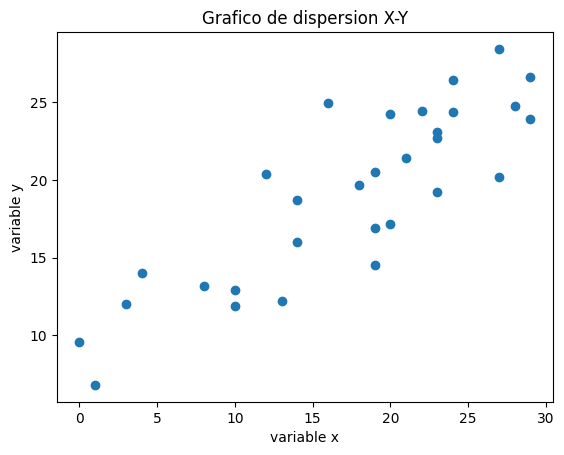

In [56]:
#exploracion visual (graficar)
plt.scatter(datos['X'], datos['Y'])
plt.title('Grafico de dispersion X-Y')
plt.xlabel('variable x')
plt.ylabel('variable y')
plt.show()

El grafico de dispersion muestra una relacion lineal de X-Y por lo tanto tiene sentido estimar un modelo de MCO

In [27]:
## estimar un modelo
#1 especificar el modelo
reg = smf.ols(formula ='Y~X',data=datos)
#2 estimar el modelo
results = reg.fit()
#3 decirlo python que no lo muestre
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        16:58:09   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

t es el estadistico t. p valor es P>/t/
intercepto: p-valo< alfa por lo tanto rechazamos H0 lo cual significa que el intercepto no pasa por el origen, 8.96 I.C(6.34-11.57)
B1 : p-valor < alfa rechazamos h0 significa que beta1 es estadisticamente distinto de cero
en promedio cuando x aumenta 1 unidad, y aumenta 0.58

## validacion cruzada
R**2

MAD = (1/n) SUMATORIA (|y-YGORRO|)

MAPE = (1/n) SUMATORIA (|(y-yGORRO)/(y)|)

MSD = (1/n) ...


In [57]:
#Calcular MAD
# 1ro calcular la Y estimada
datos['Y_hat']=results.predict(datos['X'])

In [58]:
datos.head()

,X,Y,Y_hat
0,23,19.246957,22.333385
1,19,16.878501,20.007912
2,27,20.187237,24.658857
3,13,12.176789,16.519703
4,21,21.420112,21.170648


In [59]:
datos['X2'] = datos['X']**2

In [60]:
#MAD
MAD_m1 = (datos['Y']-datos['Y_hat']).abs().mean()


In [61]:
MAD_m1

2.354303480378995

Estimar $Y = \beta_1X + \beta_2X^2$





In [62]:
#Especificar modelo
reg2 = smf.ols(formula = 'Y~X+X2',data =datos)

#Estimamos
results2 = reg2.fit()

#Mostramos
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.92e-08
Time:                        17:27:27   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

In [63]:
datos['Y_hat2']= results2.predict(datos[['X','X2']])

In [68]:
MAD_m2 = (datos['Y']-datos['Y_hat2']).abs().mean()

In [69]:
print(MAD_m1.round(3),MAD_m2.round(3))

2.354 2.355


De acuerdo con el MAD el mejor modelo es el 1: $Y = \beta_0 - \beta_1$

## Validacion cruzada


In [73]:
datos = pd.read_excel('/content/drive/MyDrive/EA_YASH_1990002/modelolineal.xlsx')
datos = datos [['X','Y']]

In [74]:
#Definir el conjunto de entrenamiento
train_set = datos.iloc[:20]
#Definir el conjunto de evaluacion
test_set = datos.iloc[20:]


In [77]:
#estimamos el modelo con el conjunto de entranamiento
##especificacion
reg3 = smf.ols(formula = 'Y~X',data = train_set)

##estimacion
results3 = reg3.fit()

## mostrar modelo
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     28.80
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           4.23e-05
Time:                        17:54:57   Log-Likelihood:                -51.332
No. Observations:                  20   AIC:                             106.7
Df Residuals:                      18   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2336      2.008      4.598      0.0

In [80]:
#evaluamos el modelo con el conjunto de evaluacion
test_set['Y_hat'] = results3.params[0]+results3.params[1]*test_set['X']

<ipython-input-80-92cce9278a2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat'] = results3.params[0]+results3.params[1]*test_set['X']


In [82]:
# calcular MAD
MAD_ts1 = (test_set['Y']-test_set['Y_hat']).abs().mean()

In [86]:
# Crear el cuadrado
train_set['X2'] = train_set['X']**2
test_set['X2'] = test_set['X']**2

## estimar y=b+ b1x +b2x2
reg4 = smf.ols(formula = 'Y~X+X2', data = train_set)
results4 = reg4.fit()

#calculamos estimado
test_set['Y_hat2'] = results.params[0]+results.params[1]*test_set['X']+results4.params[2]*test_set['X2']

#calculamos MAD
MAD_ts2 = (test_set['Y']-test_set['Y_hat2']).abs().mean()

<ipython-input-86-822189818c56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['X2'] = train_set['X']**2
<ipython-input-86-822189818c56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['X2'] = test_set['X']**2
<ipython-input-86-822189818c56>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [88]:
print(MAD_ts1.round(3), MAD_ts2.round(3))

2.108 3.355


$ Y = \beta_0 +\beta_1 X$ es mejor modelo que $Y = \beta_0 +\beta_1 X+\beta_2 X^2 $ de acuerdo a MAD y utilizando validacion cruzada